In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [8]:
fashion_mnist=tf.keras.datasets.fashion_mnist
 
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

4423680/4422102 [==============================] - 9s 2us/step


In [18]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [25]:
x_train.shape

(60000,)

In [21]:
#no. of classes
k=len(set(y_train))
k

10

In [23]:
#building the model
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_test,y_test,validation_data=(x_test, y_test), epochs=15)

Train on 10000 samples, validate on 10000 samples
Epoch 1/15
10000/10000 [==============================] - 6s 596us/sample - loss: 0.8263 - accuracy: 0.6997 - val_loss: 0.5635 - val_accuracy: 0.7876
Epoch 2/15
10000/10000 [==============================] - 5s 485us/sample - loss: 0.5542 - accuracy: 0.7931 - val_loss: 0.5017 - val_accuracy: 0.8145
Epoch 3/15
10000/10000 [==============================] - 5s 467us/sample - loss: 0.4807 - accuracy: 0.8196 - val_loss: 0.4138 - val_accuracy: 0.8450
Epoch 4/15
10000/10000 [==============================] - 5s 472us/sample - loss: 0.4328 - accuracy: 0.8331 - val_loss: 0.3798 - val_accuracy: 0.8569
Epoch 5/15
10000/10000 [==============================] - 5s 482us/sample - loss: 0.3950 - accuracy: 0.8514 - val_loss: 0.3333 - val_accuracy: 0.8767
Epoch 6/15
10000/10000 [==============================] - 4s 441us/sample - loss: 0.3648 - accuracy: 0.8635 - val_loss: 0.2983 - val_accuracy: 0.8864
Epoch 7/15
10000/10000 [==========================

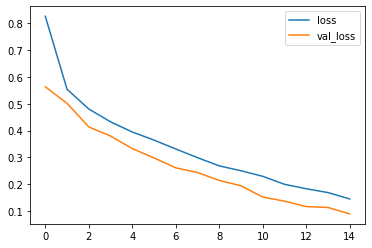

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


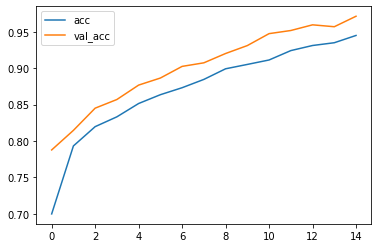

In [29]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[961   0   4  14   0   0  21   0   0   0]
 [  1 990   0   8   0   0   1   0   0   0]
 [  5   0 941   2  33   0  19   0   0   0]
 [  0   0   2 991   3   0   4   0   0   0]
 [  0   0  13   4 959   0  24   0   0   0]
 [  0   0   0   1   0 992   0   7   0   0]
 [ 26   0  23  10  39   0 901   0   1   0]
 [  0   0   0   0   0   0   0 997   0   3]
 [  1   0   0   1   0   0   0   0 998   0]
 [  0   0   0   0   0   0   0  17   0 983]]


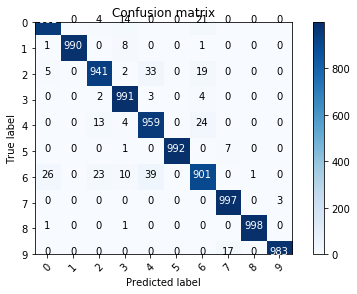

In [30]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [32]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

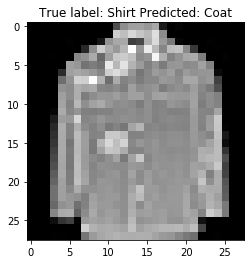

In [33]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));